In [ ]:
from pathlib import Path
import numpy as np
import pandas as pd 
from PIL import Image
import matplotlib.pyplot as plt

import cv2 as cv

# Load Cv Haar Cascade

In [13]:
face_cascade = cv.CascadeClassifier()
eyes_cascade = cv.CascadeClassifier()

In [20]:
import os
cascade_path = os.path.join(cv.data.haarcascades, 'haarcascade_frontalface_alt.xml')

face_cascade = cv.CascadeClassifier()
if not face_cascade.load(cascade_path):
    print("--(!)Error loading face cascade")

In [22]:
def detectAndDisplay(frame):
    frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    frame_gray = cv.equalizeHist(frame_gray)
    #-- Detect faces
    faces = face_cascade.detectMultiScale(frame_gray)
    for (x,y,w,h) in faces:
        center = (x + w//2, y + h//2)
        frame = cv.ellipse(frame, center, (w//2, h//2), 0, 0, 360, (255, 0, 255), 4)
        faceROI = frame_gray[y:y+h,x:x+w]
        #-- In each face, detect eyes
        eyes = eyes_cascade.detectMultiScale(faceROI)
        for (x2,y2,w2,h2) in eyes:
            eye_center = (x + x2 + w2//2, y + y2 + h2//2)
            radius = int(round((w2 + h2)*0.25))
            frame = cv.circle(frame, eye_center, radius, (255, 0, 0 ), 4)


In [24]:
try:
    img_path = cv.samples.findFile("lena.jpg")
    img = cv.imread(img_path)
except cv.error:
    print("Sample images not found in your installation.")


Sample images not found in your installation.


[ WARN:0@2057.039] global samples.cpp:61 findFile cv::samples::findFile('lena.jpg') => ''


In [28]:
!wget https://mymodernmet.com/wp/wp-content/uploads/2020/10/facial-recognition-test.jpg  -O test_0.jpg

--2025-12-22 11:30:04--  https://mymodernmet.com/wp/wp-content/uploads/2020/10/facial-recognition-test.jpg
Resolving mymodernmet.com (mymodernmet.com)... 172.67.71.100, 104.26.0.124, 104.26.1.124, ...
Connecting to mymodernmet.com (mymodernmet.com)|172.67.71.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 176031 (172K) [image/jpeg]
Saving to: ‘test_0.jpg’

test_0.jpg          100%[===================>] 171.91K  --.-KB/s    in 0.02s   

2025-12-22 11:30:04 (7.42 MB/s) - ‘test_0.jpg’ saved [176031/176031]



In [66]:
frame = cv.imread("test_0.jpg")

frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
frame_gray = cv.equalizeHist(frame_gray)
#-- Detect faces
faces = face_cascade.detectMultiScale(frame_gray)

frame_faces = frame.copy()
for (x,y,w,h) in faces:
    center = (x + w//2, y + h//2)
    frame_faces = cv.ellipse(frame, center, (w//2, h//2), 0, 0, 360, (0, 255, 0), thickness=2)

In [67]:
faces.shape, frame.shape

((22, 4), (500, 750, 3))

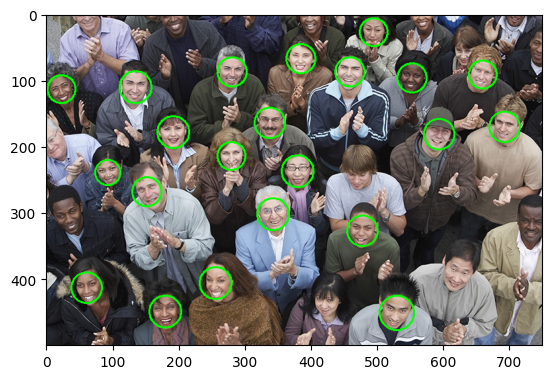

In [68]:
frame_faces = frame.copy()

plt.imshow(frame_faces[:, :, [2, 1, 0]]) # B, G, R => R, G, B

In [58]:
# ??cv.ellipse